<a href="https://colab.research.google.com/github/estrella-mooney/ma-learning-python/blob/main/LogisticRegression_Step_By_Step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression Classifier in Python - Basic Introduction



In logistic regression... basically, you are performing linear regression but applying a sigmoid function for the outcome.

#### Sigmoid  / Logistic Function

$p =1 / 1 + e^{-y}$

#### Properties of Logistic Regression

* The dependent variable follows a Bernoulli Distribution
* Estimation is maximum likelihood estimation (MLE)

#### Advantages
* Straight forward, easy to implement, doesn't require high compute power, easy to interpret, used widely.
* Doesn't require feature scaling and provides a probability score for observations.

#### Disadvantages
* Not able to handle a large number of category features/variables.
* Vulnerable to overfitting.


#### Data
Is the candy chocolate?  Let's find out because... yum

(This intro was built on a candy-data.csv dataset in DataScience folder also found at

https://github.com/fivethirtyeight/data/blob/master/candy-power-ranking/candy-data.csv )

In [352]:
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [353]:
## Import my data
df = pd.read_csv("candy-data.csv")

In [354]:
## Calling data but only the top 10
df.head(10)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
5,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
8,Candy Corn,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963
9,Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.517681


In [355]:
## Showing info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [356]:
## Calling all the data
## Label would be df['chocolate]
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [357]:
## Split the data into train/test
## Import package
from sklearn.model_selection import train_test_split

In [358]:
## this is saying that 80% will be for train, and 20% will be for train
## calling the method, and giving it our entire data and splitting it
train, test = train_test_split(df, test_size=0.3)

In [359]:
# inspect train
# we can see that 80% is here in train with number of entires 68
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 40 to 64
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    59 non-null     object 
 1   chocolate         59 non-null     int64  
 2   fruity            59 non-null     int64  
 3   caramel           59 non-null     int64  
 4   peanutyalmondy    59 non-null     int64  
 5   nougat            59 non-null     int64  
 6   crispedricewafer  59 non-null     int64  
 7   hard              59 non-null     int64  
 8   bar               59 non-null     int64  
 9   pluribus          59 non-null     int64  
 10  sugarpercent      59 non-null     float64
 11  pricepercent      59 non-null     float64
 12  winpercent        59 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 6.5+ KB


In [360]:
# inspect test
# we can see that 20% is here in test with number of entires 17

test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 21 to 53
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    26 non-null     object 
 1   chocolate         26 non-null     int64  
 2   fruity            26 non-null     int64  
 3   caramel           26 non-null     int64  
 4   peanutyalmondy    26 non-null     int64  
 5   nougat            26 non-null     int64  
 6   crispedricewafer  26 non-null     int64  
 7   hard              26 non-null     int64  
 8   bar               26 non-null     int64  
 9   pluribus          26 non-null     int64  
 10  sugarpercent      26 non-null     float64
 11  pricepercent      26 non-null     float64
 12  winpercent        26 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 2.8+ KB


In [361]:
# we will call it X_train
# In machine learning we use X and y
#Big X = features
#small y = label
#list of features - Will only pick two for this one
features = ["fruity", "pricepercent","fruity", "caramel" ]
#label = ['chocolate]
#X_train = train[features]

X_train = train[features]
y_train = train['chocolate']

# do one for test

X_test = test[features]
y_test = test['chocolate']

In [362]:
#Inspection for training set
X_train

,fruity,pricepercent,fruity,caramel
40,0,0.918,0,0
69,1,0.058,1,0
71,0,0.325,0,1
41,1,0.325,1,0
0,0,0.860,0,1
37,0,0.441,0,1
70,0,0.767,0,1
57,0,0.069,0,0
79,0,0.906,0,1
68,1,0.220,1,0


In [363]:
# Inspection for train
y_train

40    1
69    0
71    0
41    0
0     1
37    1
70    0
57    0
79    1
68    0
44    0
77    1
46    0
8     0
52    1
78    0
32    1
54    1
42    1
17    0
76    1
28    1
6     1
26    0
10    1
60    0
33    1
39    1
19    0
30    0
58    0
9     0
63    0
27    1
36    1
31    0
83    0
75    1
14    0
84    1
65    1
18    0
2     0
82    0
16    0
61    0
80    0
38    1
66    0
72    0
23    1
22    1
15    0
34    0
24    1
48    0
35    1
49    0
64    1
Name: chocolate, dtype: int64

In [364]:
X_test

,fruity,pricepercent,fruity,caramel
21,1,0.465,1,0
13,1,0.511,1,0
29,1,0.116,1,0
47,0,0.651,0,0
74,1,0.325,1,0
56,0,0.860,0,1
67,1,0.116,1,0
62,0,0.976,0,0
25,0,0.918,0,0
12,1,0.325,1,0


In [365]:
y_test

21    0
13    0
29    0
47    1
74    1
56    1
67    0
62    1
25    1
12    0
7     0
50    0
20    0
3     0
5     1
1     1
59    1
73    0
43    1
51    1
45    0
11    0
4     0
55    0
81    0
53    1
Name: chocolate, dtype: int64

<Axes: xlabel='chocolate', ylabel='count'>

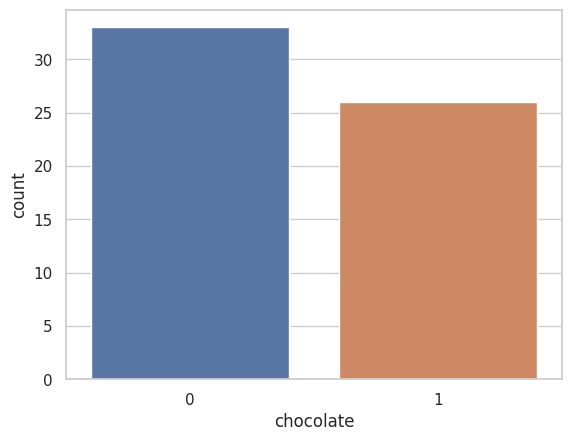

In [366]:
# lets count the labels for training data set
sns.countplot(data=train, x="chocolate")

## Reminder this is  80% so thats why there is less count

<Axes: xlabel='chocolate', ylabel='count'>

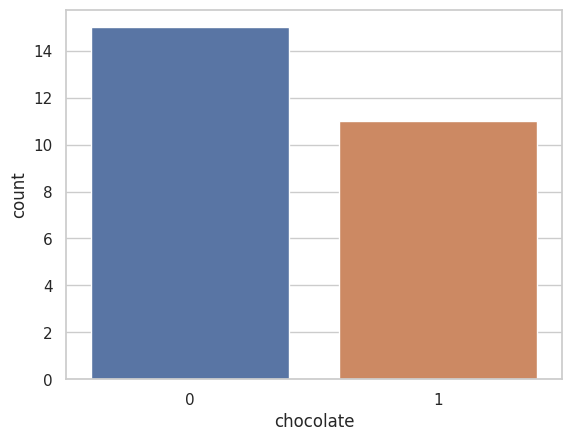

In [367]:
# lets count the labels for test data set
sns.countplot(data=test, x="chocolate")

## Reminder this is only 20% so thats why there is less count

In [368]:
# Choose and make model

# Create an object and call it model
# assign the model to be a type of LogisticRegression
model = LogisticRegression(random_state=42)
# fit does training
# fit means line of 'best fit'
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [369]:
# make some predictions
y_pred = model.predict(X_test)

In [370]:
# calculate accuracy score
#import library
from sklearn.metrics import accuracy_score

In [371]:
#Calcuate the score
accuracy_score(y_pred, y_test)

0.8846153846153846

In [372]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

In [373]:
confusion_matrix(y_pred, y_test)


array([[13,  1],
       [ 2, 10]])

In [374]:
# lets make the confusion matrix better

!pip install pretty-confusion-matrix

Text(0.5, 427.9555555555555, 'Predicted label')

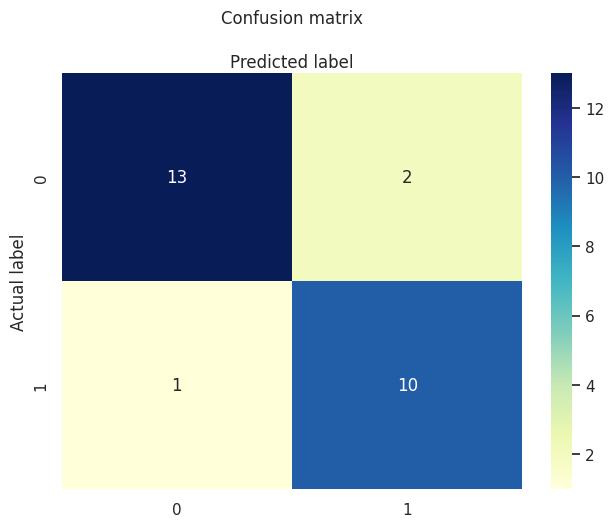

In [375]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
cnf_matrix = confusion_matrix(y_test,y_pred)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# For the number 3 they predicted it as chocolate but it was actually not chocolate.
# For number 5, it was chocolate, and they got it right
# For number 9, it was not chocolate and they got it right 9 times
# For number 0 they got it right, it was not chocolate 0 times